# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Iris dataset** from `scikit-learn`. This dataset is a classic dataset in machine learning and statistics, widely used for clustering tasks. It consists of many samples of iris flowers. Here are the key features and characteristics of the dataset:

##### Features:
1. **Sepal Length**: The length of the sepal in centimeters.
2. **Sepal Width**: The width of the sepal in centimeters.
3. **Petal Length**: The length of the petal in centimeters.
4. **Petal Width**: The width of the petal in centimeters.

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Iris dataset:

Use scikit-learn to load the Iris dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [2]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris_data = load_iris()

# Convert to DataFrame
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)

# Display the DataFrame
print(iris_df)

# Your code here...
print(f"\nThe number of rows in the dataset are: {len(iris_df)}")
print(f"\nThe number of columns in the dataset are: {iris_df.shape[1]}")

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

The number of rows in the dataset are: 

#### **Question 2:** 
#### Data-visualization

Let's create plots to visualize the relationships between the features (sepal length, sepal width, petal length, petal width).


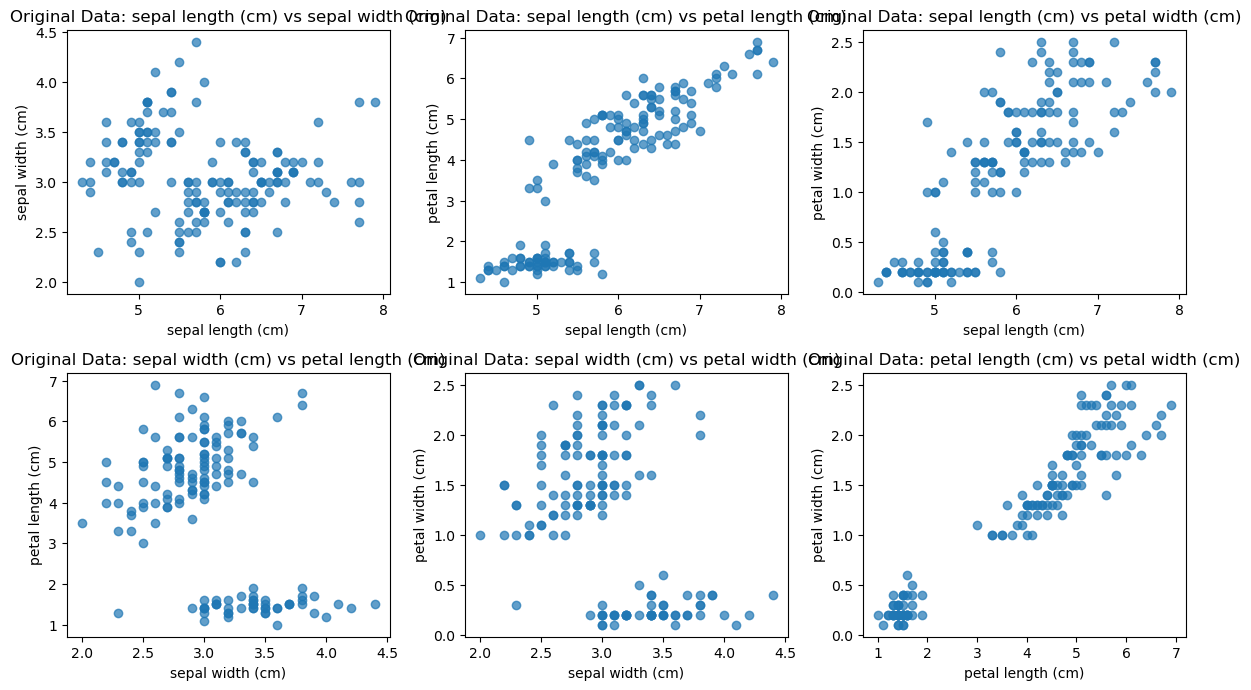

In [3]:
def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(12, 10))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = iris_df.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(iris_df, feature_names, title_prefix='Original Data: ')

**Question:**
- Do you notice any patterns or relationships between the different features? How might these patterns help in distinguishing between different species?

> Your answer...
There are patterns and relationships between combination of features. Petal and sepal measurements are significantly different among the species. This will help us in identifying different species.

**Graph 1 - sepal width and sepal length**
* Group with larger sepal width but smaller sepal length.
* Group with larger sepal length but smaller sepal width.

**Graph 2 - petal length and sepal length**
* Group with small petal length and small sepal length.
* Group with large petal length and medium to large sepal length.

**Graph 3 - petal width and sepal length**
* Group with small petal width and small sepal length.
* Group with large petal width and large sepal length.

**Graph 4 - petal length and sepal width**
* Group with small petal length and large sepal width.
* Group with large petal length and small sepal width.

**Graph 5 - petal width and sepal width**
* Group with small petal width and large sepal width.
* Group with large petal width and small sepal width.

**Graph 6 - petal width and petal length**
* Group with small petal width and small petal length.
* Group with large petal width and large petal length.

#### **Question 3:** 
#### Data cleaning

In [4]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale all the features in the dataset
scaled_features = scaler.fit_transform(iris_df)

# Create a new DataFrame with scaled features
scaled_iris_df = pd.DataFrame(scaled_features, columns=iris_data.feature_names)

# Display the first few rows of the scaled DataFrame
print(scaled_iris_df.head())
print(scaled_iris_df.columns)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

> Your answer here ... 

**Importance of Standardization**
* Equal Weightage: Standardization transforms features to a common scale, giving them equal importance. In raw data, larger values can dominate the clustering process, skewing the results.

* Distance Calculation: K-Means relies on calculating distances between data points. If features are on different scales, the algorithm prioritizes variables with larger ranges, which distorts cluster formation.

* Improved Convergence: Algorithms like K-Means often converge more efficiently on standardized data, leading to faster and more reliable clustering.

**Implications of Using Unstandardized Data**
* Biased Clusters: Features with larger ranges or different units will disproportionately influence the clusters, leading to biased and misleading groupings.

* Interpretability Issues: The resulting clusters may be hard to interpret or make sense of because they reflect the scales of features rather than inherent patterns in the data.

* Poor Performance: The overall performance and accuracy of the clustering algorithm can degrade, making it challenging to draw meaningful insights.

#### **Question 4:** 
#### K-means clustering 

Apply the K-Means clustering algorithm to the Iris dataset. Choose the value 3 for the number of clusters (`k=3`) and fit the model. Assign cluster labels to the original data and add them as a new column in the DataFrame.

c:\Users\v-sharmashwe\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


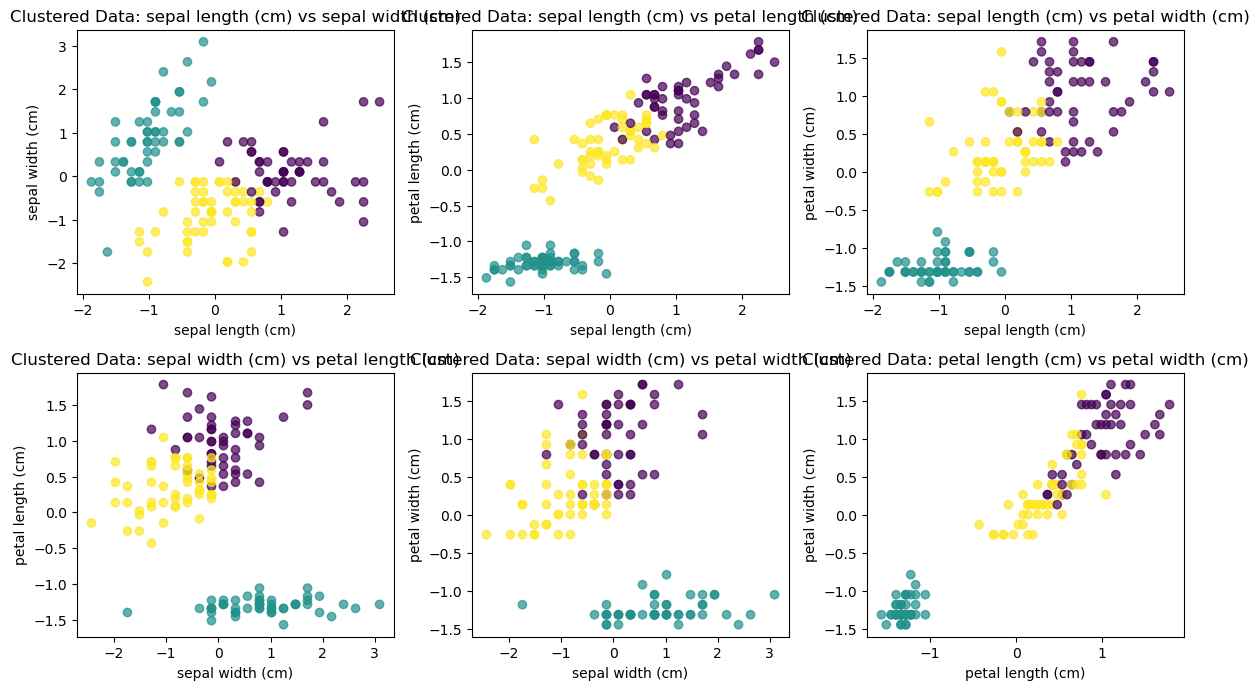

In [5]:
# Your answer...

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=12345)
clusters = kmeans.fit(scaled_iris_df)

clustered_iris_data = scaled_iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].copy()

# Add cluster labels to the copied DataFrame
clustered_iris_data['Cluster'] = clusters.labels_

# Use the helper function to plot scatter plots, colored by cluster labels
plot_feature_pairs(clustered_iris_data, feature_names, color_labels=clustered_iris_data['Cluster'], title_prefix='Clustered Data: ')

We chose `k=3` for the number of clusters arbitrarily. However, in a real-world scenario, it is important to determine the optimal number of clusters using appropriate methods.

**Question**: What is one method commonly used to determine the optimal number of clusters in K-means clustering, and why is this method helpful?

> Your answer here...

To find the best number of clusters, we use the **elbow method**. This involves plotting the total WSSD against different values of $k$ and looking for an “elbow”—the point where increasing the number of clusters no longer leads to a significant reduction in WSSD. This is shown by the code below. The optimal value of k derived below is 3.

In [6]:
clusters.inertia_

# Initialize an empty list to store the WSSD values
wssd_list = []

# Loop through values of k from 1 to 10 (feel free to adjust this range).
for k in range(1, 10): 

    # Perform K-means clustering
    elbow_kmeans = KMeans(n_clusters=k, random_state=0)
    elbow_kmeans.fit(scaled_iris_df)

    
    # Append the WSSD (inertia) to the wssd_list
    wssd_list.append(elbow_kmeans.inertia_)

# Create a DataFrame
iris_clust_ks = pd.DataFrame({
    "k": range(1, 10),  # List of k values
    "wssd": wssd_list  # List of WSSD values from the loop
})

# Display the DataFrame
iris_clust_ks

c:\Users\v-sharmashwe\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\v-sharmashwe\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\v-sharmashwe\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\v-sharmashwe\AppData\Local\anaconda3\Lib\site-packages\sklearn\c

,k,wssd
0,1,600.000000
1,2,222.361705
2,3,139.820496
3,4,114.092547
4,5,90.807592
5,6,81.504739
6,7,72.821040
7,8,65.244536
8,9,57.307349


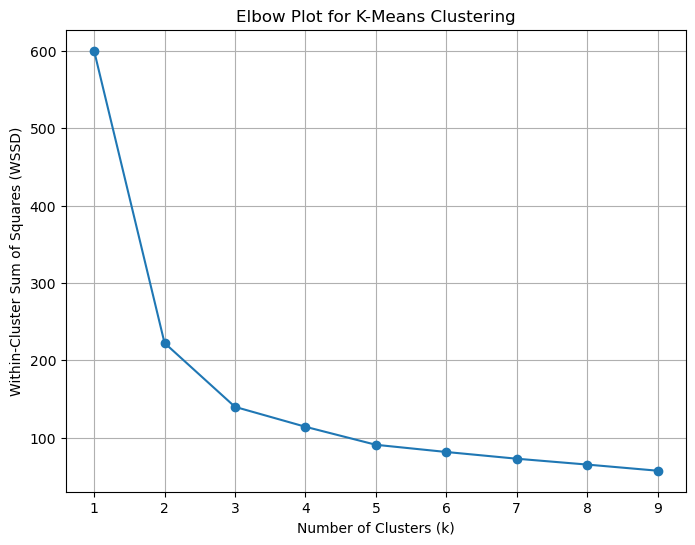

In [7]:
# Create the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(iris_clust_ks['k'], iris_clust_ks['wssd'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WSSD)')
plt.title('Elbow Plot for K-Means Clustering')
plt.xticks(iris_clust_ks['k'])  # Optional: to ensure all k values are shown on the x-axis
plt.grid(True)
plt.show()

#### **Question 5:** 
#### Bootstrapping 

Implement bootstrapping on the mean of Petal Width. Generate 10000 bootstrap samples, calculate the mean for each sample, and compute a 90% confidence interval.

In [8]:
# Your answer here...

np.random.seed(123)

# Initialize an empty list to store the bootstrap samples
bootstrap_samples = []

for i in range(10000):
    sample = iris_df.sample(frac=1, replace=True)  # Sample with replacement
    sample = sample.assign(replicate=i)  # Add replicate number
    bootstrap_samples.append(sample)  # Store the sample

# Combine all bootstrap samples into one DataFrame
boot_df = pd.concat(bootstrap_samples)

# Calculate the mean price for each bootstrap sample (replicate)
mean_petal_width = boot_df.groupby('replicate')['petal width (cm)'].mean().reset_index(name='mean_petal_width')

# Compute 90% confidence interval
alpha = 0.10
lower_bound = mean_petal_width['mean_petal_width'].quantile(alpha / 2)
upper_bound = mean_petal_width['mean_petal_width'].quantile(1 - alpha / 2)

# Display the result
print(f"Mean of Petal Width: \n{mean_petal_width}")
print(f"\n90% Confidence Interval of Mean Petal Width: ({lower_bound}, {upper_bound})")

Mean of Petal Width: 
      replicate  mean_petal_width
0             0          1.244667
1             1          1.255333
2             2          1.098667
3             3          1.160000
4             4          1.158667
...         ...               ...
9995       9995          1.188667
9996       9996          1.148667
9997       9997          1.150000
9998       9998          1.155333
9999       9999          1.250667

[10000 rows x 2 columns]

90% Confidence Interval of Mean Petal Width: (1.0979666666666665, 1.302)


**Question:**
- Why do we use bootstrapping in this context? What does it help us understand about the mean?

>  Your answer...
Construct confidence intervals that provide a range within which the true population mean likely falls.

**Question:**
- What is the purpose of calculating the confidence interval from the bootstrap samples? How does it help us interpret the variability of the estimate?

> Your answer...

**Purpose of Confidence Interval:**
* Estimate Range: It provides a range within which the true population parameter (like the mean) is likely to fall, offering a measure of precision.

* Uncertainty: It quantifies the uncertainty associated with the estimate. Instead of a single point estimate, the interval captures the possible variation in the data.

**Interpreting Variability:**
* Insight into Stability: A narrow confidence interval indicates that the estimate is relatively stable and precise. Conversely, a wide interval suggests more variability and less certainty.

* Comparison: By comparing confidence intervals across different groups or samples, you can assess whether differences are likely due to chance or reflect true differences.

* Decision Making: It provides a statistical basis for making decisions and predictions. For instance, if the interval for a parameter does not include zero, it suggests a statistically significant effect.

**Question:**

- Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the Petal Width appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

> Your answer here...

* Confidence interval: The variability observed in the bootstrapped means is narrow (1.0979666666666665, 1.302). Tt suggests that the bootstrapped means don't vary much. This indicates a stable and reliable estimate for the population mean.

* Spread of Bootstrapped Means: Examining the spread of these means, if the majority are clustered closely around the central value, it indicates low variability and a high degree of confidence in our mean estimate.

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are well-constructed and correctly interpreted to explore relationships between features and species. | Visualizations are poorly constructed or not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
